# Assignment 4. Basics of neural networks (classification)
## General Assignment

Before performing the practical work, you need download the data set accordingly to the option on your machine
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set)
2. Build a model using [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) and [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). On the basis of experiments with MLPClassifier, select best values for learning rate, the regularization parameter, the optimization function. Try different architectures for the MLPClassifier (number of hidden layers and number of neurons in each layer). Use [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) for evaluation.
3. Build learning curves for better explanation of your experiments for training set and validation set on the same plot (f1_score on the max_iter parameter for MLPClassifier).

## Options
Data sets are taken from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/
The option is determined by the data set, which can be downloaded from the link above:

1. Sponge
2. Water Treatment Plant
3. Synthetic Control Chart Time Series
4. Character Trajectories
5. Abalone
6. Libras Movement
7. KEGG Metabolic Relation Network (Directed)
8. SMS Spam Collection
9. **seeds**
10. Human Activity Recognition Using Smartphones
11. User Knowledge Modeling
12. NYSK
13. Activities of Daily Living (ADLs) Recognition Using Binary Sensors
14. Dresses_Attribute_Sales
15. Wholesale customers
16. StoneFlakes
17. Gesture Phase Segmentation
18. AAAI 2014 Accepted Papers
19. Dow Jones Index
20. AAAI 2013 Accepted Papers
21. wiki4HE
22. Folio
23. Mice Protein Expression
24. Improved Spiral Test Using Digitized Graphics Tablet for Monitoring Parkinson’s Disease


In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.exceptions import ConvergenceWarning

In [282]:
data = pd.read_csv('Assignment_Data/seeds_dataset.csv')
data.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Analysis

In [283]:
data.any().isnull()

area                       False
perimeter                  False
compactness                False
length_of_kernel           False
width_of_kernel            False
asymmetry_coefficient      False
length_of_kernel_groove    False
wheat_type                 False
dtype: bool

In [284]:
data.corr()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheat_type
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length_of_kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width_of_kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetry_coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
length_of_kernel_groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
wheat_type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [285]:
# train test split
features = ['area', 'perimeter', 'compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']
target = ['wheat_type']
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Perceptron

In [286]:
model = Pipeline([
    ('scaler',StandardScaler()),
    ('Perceptron', Perceptron(n_jobs=-1, random_state=42))
])

In [287]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [288]:
print(f'Accuracy: {(accuracy_score(y_test,prediction)*100).__round__(2)}%')

Accuracy: 95.24%


## MLP

In [289]:
solv = ['lbfgs','sgd', 'adam'] #default = adam
l_rate = [1e-4, 1e-3, 1e-2]   #default = 0.001
reg = [1e-5, 1e-4, 1e-3]  #default = 0.0001
lr = ['constant', 'invscaling', 'adaptive']



no_of_tests = 20
max_layer_amount = 5
max_neuron_amount = 100
hidden = []
random.seed(42)
for i in range(0,no_of_tests): # amount of variations
    no_of_layers = random.randrange(1,max_layer_amount+1)
    t = ()
    for j in range(0,no_of_layers):
        t += (random.randrange(1,max_neuron_amount+1),)
    hidden.append(t)

model = Pipeline([
    ('scaler',StandardScaler()),
    ('MLPClassifier', MLPClassifier(verbose=False, random_state=42))
])

#hidden = [(1,), (2,), (3,), (4,), (5,)]

In [290]:
print(hidden)

[(4,), (32, 29, 18), (87,), (12, 76, 55, 5, 4), (28,), (65, 78), (72,), (92, 84), (54, 29, 58, 76, 36), (98,), (90, 55), (36, 20, 28), (14, 12, 49), (46,), (78, 34, 6), (69, 16, 49, 11), (38, 81, 80, 47, 74), (91, 9), (85,), (99, 38)]


In [291]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'MLPClassifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'MLPClassifier__activation', 'MLPClassifier__alpha', 'MLPClassifier__batch_size', 'MLPClassifier__beta_1', 'MLPClassifier__beta_2', 'MLPClassifier__early_stopping', 'MLPClassifier__epsilon', 'MLPClassifier__hidden_layer_sizes', 'MLPClassifier__learning_rate', 'MLPClassifier__learning_rate_init', 'MLPClassifier__max_fun', 'MLPClassifier__max_iter', 'MLPClassifier__momentum', 'MLPClassifier__n_iter_no_change', 'MLPClassifier__nesterovs_momentum', 'MLPClassifier__power_t', 'MLPClassifier__random_state', 'MLPClassifier__shuffle', 'MLPClassifier__solver', 'MLPClassifier__tol', 'MLPClassifier__validation_fraction', 'MLPClassifier__verbose', 'MLPClassifier__warm_start'])

In [292]:
# GridsearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
parameters = {'MLPClassifier__learning_rate_init': l_rate, 'MLPClassifier__solver': solv, 'MLPClassifier__alpha': reg, 'MLPClassifier__hidden_layer_sizes':hidden, 'MLPClassifier__learning_rate': lr}
#parameters = {'MLPClassifier__learning_rate_init': l_rate}
gscv = GridSearchCV(estimator=model, param_grid=parameters, scoring="accuracy", cv=skf, n_jobs=-1)
gscv.fit(X_val, y_val)
gscv.best_params_

{'MLPClassifier__alpha': 1e-05,
 'MLPClassifier__hidden_layer_sizes': (32, 29, 18),
 'MLPClassifier__learning_rate': 'constant',
 'MLPClassifier__learning_rate_init': 0.0001,
 'MLPClassifier__solver': 'lbfgs'}

In [305]:
best_alpha = 1e-05 # or 0.00001
best_hidden_layer_size = (32,29,18)
#best_hidden_layer_size = (5,10,10,10)
best_learning_rate = 'constant'
best_learning_rate_init = 0.0001 # won't be used with lbfgs anyway
best_solver = 'lbfgs'

### Non-optimized pipeline

In [294]:
# Default values
model = Pipeline([
    ('scaler',StandardScaler()),
    ('MLPClassifier', MLPClassifier(verbose=False,random_state=42))
])
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Default Accuracy: {(accuracy_score(y_test,prediction)*100).__round__(2)}%')

Default Accuracy: 92.86%


### Optimized pipeline

In [307]:
#(32,29,18) and the other best parameters results in 95.24%
model = Pipeline([
    ('scaler',StandardScaler()),
    ('MLPClassifier', MLPClassifier(verbose=False,
                                    random_state=42,
                                    alpha=best_alpha,
                                    solver=best_solver,
                                    learning_rate=best_learning_rate,
                                    hidden_layer_sizes=best_hidden_layer_size))
])
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'Optimized Accuracy: {(accuracy_score(y_test,prediction)*100).__round__(2)}%')
print(f'F1 Score:{(f1_score(y_test, prediction, average="micro"))}')

Optimized Accuracy: 95.24%
F1 Score:0.9523809523809523


In [313]:
iterations = range(1,50)
test_scores = []
val_scores = []
for i in iterations:
    model = Pipeline([
    ('scaler',StandardScaler()),
    ('MLPClassifier', MLPClassifier(verbose=False,
                                    random_state=42,
                                    alpha=best_alpha,
                                    solver=best_solver,
                                    learning_rate=best_learning_rate,
                                    hidden_layer_sizes=best_hidden_layer_size,
                                    max_iter=i))
    ])
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    test_scores.append(f1_score(y_test,prediction, average='micro'))
    prediction = model.predict(X_val)
    val_scores.append(f1_score(y_val,prediction, average='micro'))

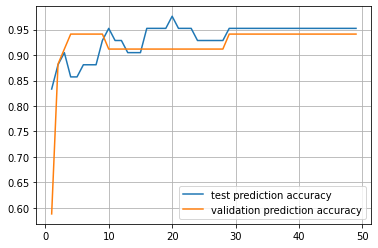

In [315]:
plt.plot(iterations, test_scores, label='test prediction accuracy')
plt.plot(iterations, val_scores, label='validation prediction accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()